### Import the appropriate modules 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re
import seaborn as sns

### Load in the Data as a Pandas Data Frame

In [2]:
batting = pd.read_csv('Batting.csv', engine='python')
batting.head()

,playerID,nameLast,nameFirst,birthYear,yearID,stint,teamID,lgID,G,AB,...,RBI,SB,CS,BB,SO,IBB,HBP,SH,SF,GIDP
0,abercda01,Frank,Abercrombie,1850,1871,1,TRO,NaN,1,4,...,0.0,0.0,0.0,0,0.0,NaN,NaN,NaN,NaN,NaN
1,addybo01,Bob,Addy,1842,1871,1,RC1,NaN,25,118,...,13.0,8.0,1.0,4,0.0,NaN,NaN,NaN,NaN,NaN
2,allisar01,Art,Allison,1849,1871,1,CL1,NaN,29,137,...,19.0,3.0,1.0,2,5.0,NaN,NaN,NaN,NaN,NaN
3,allisdo01,Doug,Allison,1846,1871,1,WS3,NaN,27,133,...,27.0,1.0,1.0,0,2.0,NaN,NaN,NaN,NaN,NaN
4,ansonca01,Cap,Anson,1852,1871,1,RC1,NaN,25,120,...,16.0,6.0,2.0,2,1.0,NaN,NaN,NaN,NaN,NaN


### What are the dimensions of the data?

In [5]:
batting.shape

(102816, 25)

### Add a column to the data frame that combines nameLast and nameFirst, entitle this playerName.  
### You will be using this column extensively

In [6]:
batting['playerName'] = batting['nameFirst'] +' '+ batting['nameLast']

### How many players appeared in 1880?  Required: Count of players

In [7]:
batting[batting['yearID'] == 1880]['playerID'].nunique()

127

### Which five years had the most players appear? Required: Year and count of players

In [8]:
batting.groupby('yearID')['playerID'].aggregate(['nunique']).nlargest(5,'nunique')

,nunique
yearID,
2016,1353
2015,1348
2014,1320
2013,1304
2011,1295


### How many players had over 500 or more ABs?  Required: Count of players

In [9]:
sum(batting.groupby('playerID')['AB'].sum()>=500)

5152

### Which player had the most HRs in 1909?  Required: Player and HR total

In [10]:
maxim = batting[(batting['yearID']==1909)].groupby('playerID')['HR'].sum().max()
batting[(batting['yearID']==1909)&(batting['HR']==maxim)].set_index('playerName')['HR']

playerName
Cobb Ty    9
Name: HR, dtype: int64

### How many players have had more than 200 hits, 20 2Bs, 5 3Bs, and 20 HRs in a season? 
### Required: Player, H, 2B, 3B, HR

In [11]:
x = batting[(batting['H']>200)&(batting['2B']>20)&(batting['3B']>5&(batting['HR']>20))][['playerName', 'H', '2B', '3B', 'HR']].set_index('playerName')
print("Count of such players is: " + str(len(x)) + " and the stats are as below" )
x

Count of such players is: 445 and the stats are as below


,H,2B,3B,HR
playerName,,,,
Browning Pete,220,35,16,4
Lyons Denny,209,43,14,6
O'Neill Tip,225,52,19,14
Thompson Sam,203,29,23,11
Glasscock Jack,205,40,3,7
Delahanty Ed,219,35,18,19
Duffy Hugh,203,23,7,6
Thompson Sam,222,37,13,11
Brodie Steve,210,25,11,3


### Who had the highest batting average in 2009?  Required: Player, Average, and HRs for that player.  
### Hint:  Batting Average is H/AB

In [12]:
batting['average'] = batting['H']/batting['AB']

### What was the average amount of HRs for all players in 1975 who had 200 or more ABs?

In [13]:
batting[(batting['AB']>=200)&(batting['yearID']==1975)].mean()['HR']

9.4724409448818889

### Same question as above but for players in 1987 with 400 or more ABs?

In [14]:
batting[(batting['AB']>=400)&(batting['yearID']==1987)].mean()['HR']

19.006410256410255

### In 1984, who had the top 5 highest batting averages?

In [15]:
print(batting[batting['yearID'] == 1984].nlargest(5,'average')['playerName'].values)

['Quirk Jamie' 'Von Ohlen Dave' 'Forster Terry' 'Smith Zane' 'Laga Mike']


### In 1963, who had the 5 lowest batting averages for players with 400 or more ABs?

In [16]:
print(batting[(batting['AB']>=400)&(batting['yearID']==1963)].nsmallest(5,'average')['playerName'].values)

['Lillis Bob' 'Goss Howie' 'Bateman John' 'Aspromonte Bob' 'Wine Bobby']


### Which years had the most 2Bs?  Top 5

In [17]:
print(batting.nlargest(5,'2B')['playerName'].values)

['Webb Earl' 'Burns George' 'Medwick Joe' 'Greenberg Hank' 'Waner Paul']


### Who has the most 3Bs for their career?

In [19]:
x = batting.set_index('playerID').groupby(level=0).sum().nlargest(1,'3B').index[0]
batting[batting['playerID']==x]['playerName'][7606]

'Crawford Sam'

### Who had the most HRs in their 20s (Aged 29 or less)?

In [20]:
batting['age'] = batting['yearID'] - batting['birthYear']
print(batting[(batting['age']>=20)&(batting['age']<=29)].nlargest(1,'HR')['playerName'].values)

['Maris Roger']


### Who had the most 2Bs, 3Bs, and HRs combined in one season?

In [21]:
print(batting[batting[['2B','3B','HR']].sum(axis=1) == batting[['2B','3B','HR']].sum(axis=1).max()]['playerName'].values)

['Ruth Babe']


### Which team has had the most players with 100 or more RBIs in a season?

In [22]:
batting[batting['RBI']>=100].groupby(['teamID','yearID'])['playerID'].count().argmax()[0]

'BLN'

### How many players have played 100 or more games from 1900 on?

In [23]:
sum(batting[batting['yearID']>=1900].groupby('playerID').sum()['G']>100)

8067

### Who scored the most runs in 1938?

In [24]:
batting[batting['yearID']==1938].groupby(['playerID','playerName'])['RBI'].sum().argmax()[1]

'Foxx Jimmie'

### In 2012 did anyone have at least 20 2Bs, 10 3Bs, 10 HRs, and 10 SBs?  If so, who were they?

In [25]:
'No' if len(batting[(batting['2B']>=20)&(batting['3B']>=10)&(batting['HR']>=10)&(batting['SB']>=10)&(batting['yearID']==2012)])==0 else print(batting[(batting['2B']>=20)&(batting['3B']>=10)&(batting['HR']>=10)&(batting['SB']>=10)&(batting['yearID']==2012)]['playerName'].values)

['Cabrera Melky' 'Castro Starlin' 'Jackson Austin' 'Reyes Jose']


### Create a column that calculates OBP (on base percentage)
### Formula: OBP = (Hits + Walks + Hit by Pitch) / (At Bats + Walks + Hit by Pitch + Sacrifice Flies + Sacrifice Hits).

In [26]:
batting['OBP'] = np.divide(np.sum(batting[['H','BB','HBP']], axis=1), np.sum(batting[['AB','BB','HBP','SF','SH']], axis=1))

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in true_divide
  """Entry point for launching an IPython kernel.


### For all players with 500 or more ABs which players had the top 5 OBPs in 2016?

In [85]:
print(batting[(batting['AB']>=500)&(batting['yearID']==2016)].nlargest(5,'OBP')['playerName'].values)

['Trout Mike' 'Votto Joey' 'LeMahieu DJ' 'Goldschmidt Paul'
 'Donaldson Josh']


### Who had the highest OBP of all time?  Required: Player has to have had at least 500 ABs and 30 HRs.  Top 5.

In [35]:
print(batting[(batting['AB']>=500)|(batting['HR']>=30)].nlargest(5,'OBP')['playerName'].values)

['Bonds Barry' 'Bonds Barry' 'Williams Ted' 'Ruth Babe' 'Bonds Barry']


### Bonus: I would like a barchart depicting the total amount of HRs by year

In [71]:
data = batting.groupby('yearID')['HR'].sum()

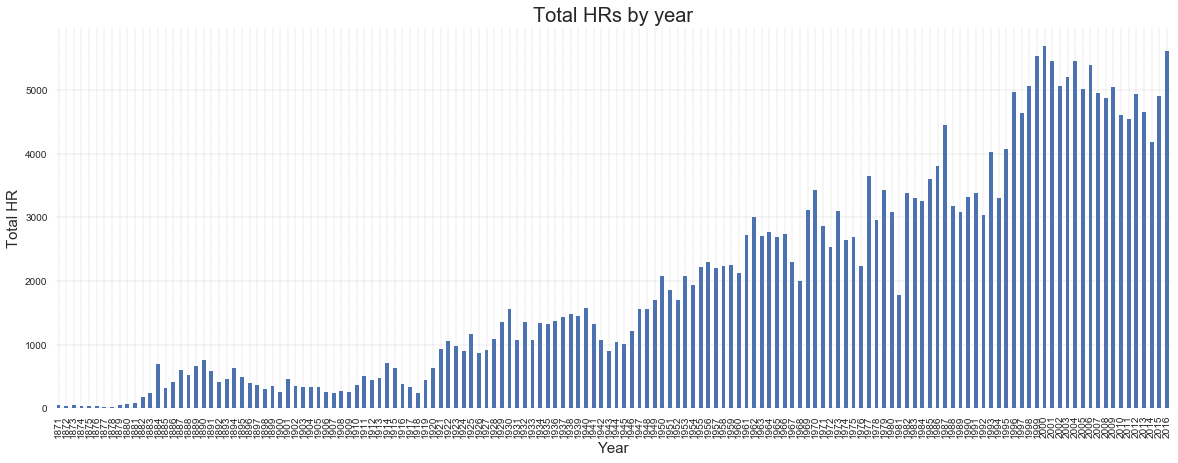

In [70]:
fig, ax = plt.subplots(figsize=(20,7))
data.plot.bar()
ax.set_title('Total HRs by year', fontsize=20)
ax.set_xlabel('Year', fontsize=15)
ax.set_ylabel('Total HR', fontsize=15 );
ax.set_facecolor('white');
ax.grid(color='black', linestyle='-.', linewidth=.1);
fig

In [ ]:
fig, ax = plt.plot

### Bonus #2: I would like a line graph depicting the total amount of Ks per year

In [72]:
batting.columns

Index(['playerID', 'nameLast', 'nameFirst', 'birthYear', 'yearID', 'stint',
       'teamID', 'lgID', 'G', 'AB', 'R', 'H', '2B', '3B', 'HR', 'RBI', 'SB',
       'CS', 'BB', 'SO', 'IBB', 'HBP', 'SH', 'SF', 'GIDP', 'playerName',
       'average', 'age', 'OBP'],
      dtype='object')

In [76]:
data = batting.groupby('yearID')['SO'].sum()

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\pyplot.py:524: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


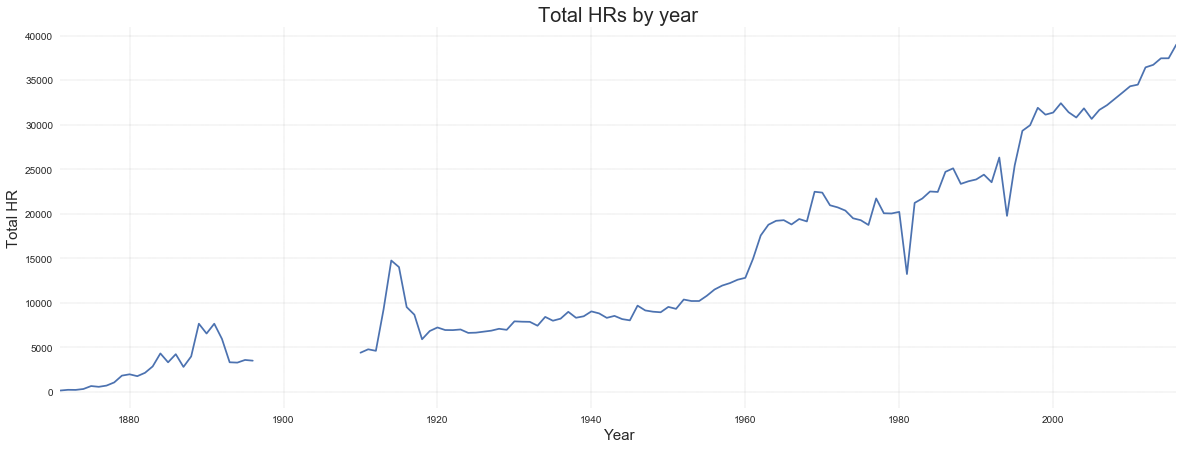

In [78]:
fig, ax = plt.subplots(figsize=(20,7));
data.plot.line();
ax.set_title('Total HRs by year', fontsize=20);
ax.set_xlabel('Year', fontsize=15);
ax.set_ylabel('Total HR', fontsize=15 );
ax.set_facecolor('white');
ax.grid(color='black', linestyle='-.', linewidth=.1);
fig